# GLASS PCA

Imprting dependencies


In [3]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

Loading the glass file from the "data folder"

In [4]:
glass_data = arff.loadarff('data/Glass_withoutdupl_norm.arff')
df = pd.DataFrame(glass_data[0])

In [5]:
print(df)

     var_0000  var_0001  var_0002  var_0003  var_0004  var_0005  var_0006  \
0    0.467651  0.321584  0.768880  0.246630  0.838799  0.099737  0.298340   
1    0.496412  0.220491  0.776032  0.316598  0.919973  0.089145  0.279479   
2    0.519133  0.404464  0.768012  0.334978  0.801622  0.092369  0.271238   
3    0.199650  0.547373  0.374284  0.362223  0.817017  0.000000  0.177913   
4    0.847261  0.286361  0.000000  0.217792  0.000000  0.019135  1.000000   
..        ...       ...       ...       ...       ...       ...       ...   
209  0.495555  0.438735  0.749682  0.277775  0.791251  0.092286  0.260617   
210  0.515273  0.346053  0.777602  0.548135  0.863624  0.108131  0.230353   
211  0.459787  0.517479  0.773646  0.285545  0.761141  0.057688  0.223982   
212  0.442959  0.297568  0.631711  0.421653  0.884864  0.113589  0.276465   
213  0.485919  0.548648  0.481699  0.408150  0.656716  0.000000  0.348888   

        id outlier  
0      1.0   b'no'  
1      2.0   b'no'  
2      3.0  

Copying code from https://medium.com/data-science/principal-component-analysis-made-easy-a-step-by-step-tutorial-184f295e97fe

Creating the PCA class:

In [6]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None
    
    def fit(self, X):
        # Step 1: Standardize the data (subtract the mean)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Step 2: Compute the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Step 3: Compute the eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Step 4: Sort the eigenvalues and corresponding eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Step 5: Select the top n_components
        self.components = eigenvectors[:, :self.n_components]

        # Calculate explained variance
        total_variance = np.sum(eigenvalues)
        self.explained_variance = eigenvalues[:self.n_components] / total_variance

    def transform(self, X):
        # Step 6: Project the data onto the selected components
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def plot_explained_variance(self):
        # Create labels for each principal component
        labels = [f'PCA{i+1}' for i in range(self.n_components)]

        # Create a bar plot for explained variance
        plt.figure(figsize=(8, 6))
        plt.bar(range(1, self.n_components + 1), self.explained_variance, alpha=0.7, align='center', color='blue', tick_label=labels)
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance by Principal Components')
        plt.show()

In [7]:
#Trasforming the pd dataset to the desired format

X = df.to_numpy()
data = X[:, :7].astype(np.float64)
names = X[:,7]

yn = X[:,8]


In [22]:
names

array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
       13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0,
       24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0,
       35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0,
       46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0,
       57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0,
       68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0,
       79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0,
       90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0,
       101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0,
       110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0,
       119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0,
       128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0,
       137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 14

In [8]:
# Apply PCA
pca = PCA(n_components=3)
pca.fit(data)
X_transformed = pca.transform(data)

print("Explained Variance:\n", pca.explained_variance)

Explained Variance:
 [0.57298818 0.17429667 0.12193544]


In [9]:
X_transformed.shape

(214, 3)

we plot the data:

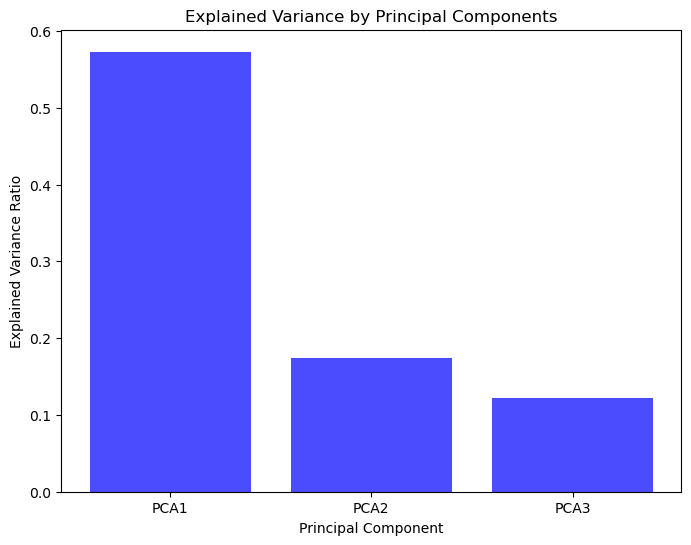

In [10]:
pca.plot_explained_variance()

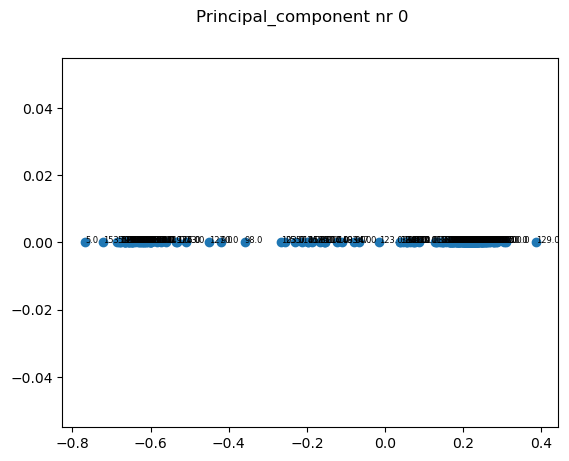

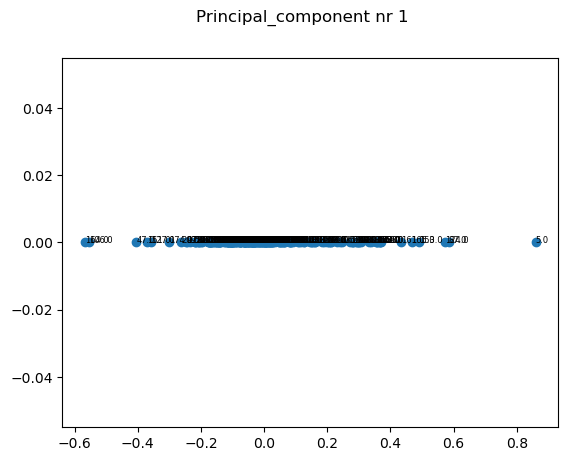

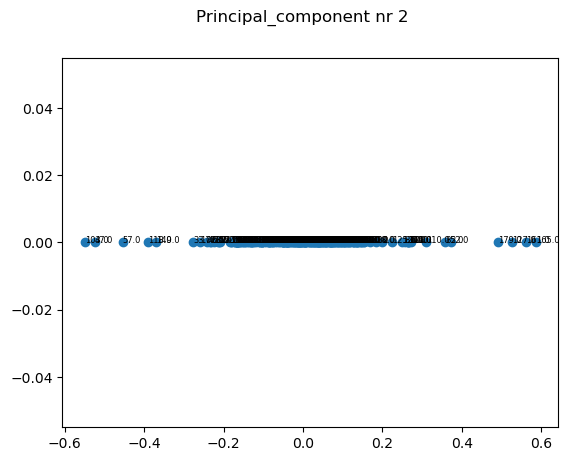

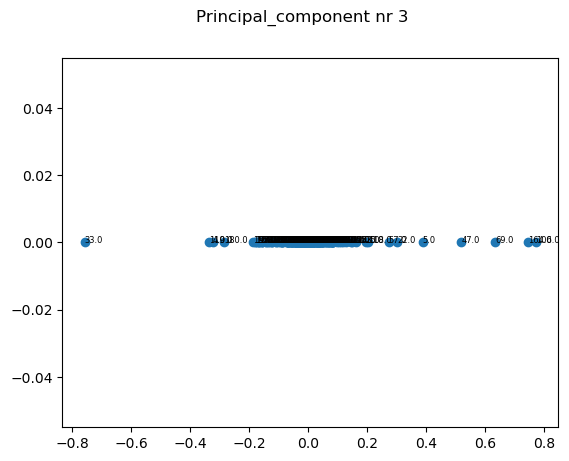

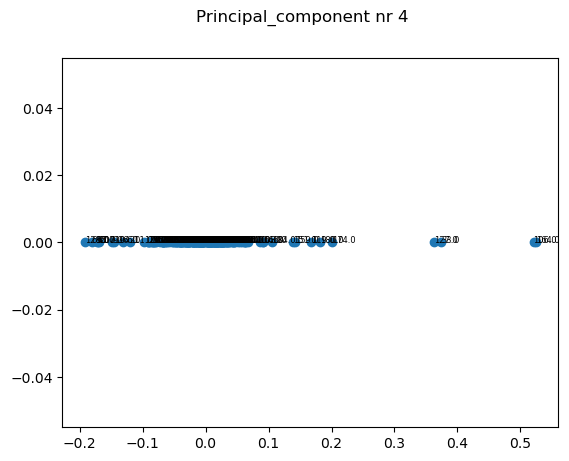

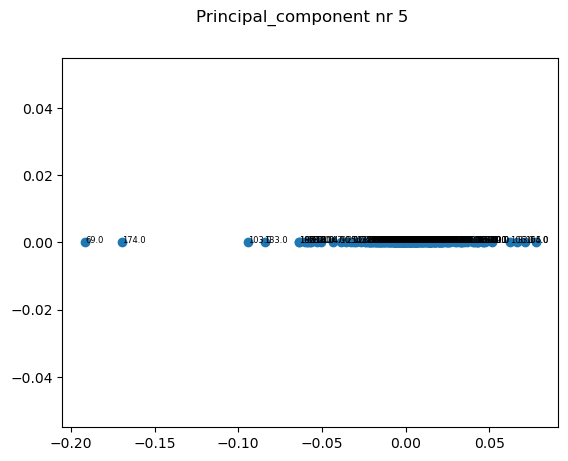

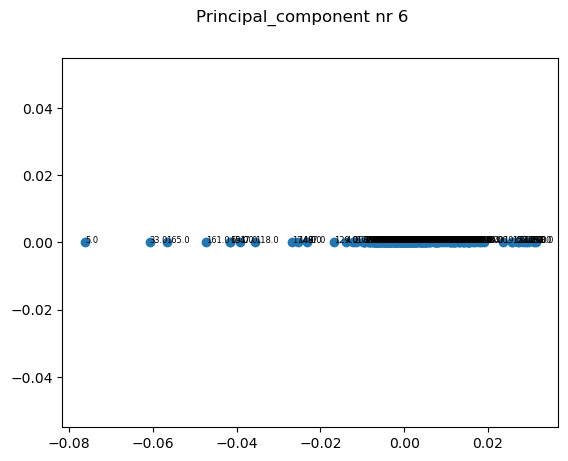

In [44]:
for i in range(0,7,1):
    fig, ax1 = plt.subplots()
    fig.suptitle(f'Principal_component nr {i}')
    ax1.scatter(X_transformed[:,i],np.zeros(len(data)))

    for idx,n in enumerate(names):
        ax1.annotate(str(n), (X_transformed[idx,i],0),size = 6)


    plt.show()
        

In [ ]:
i

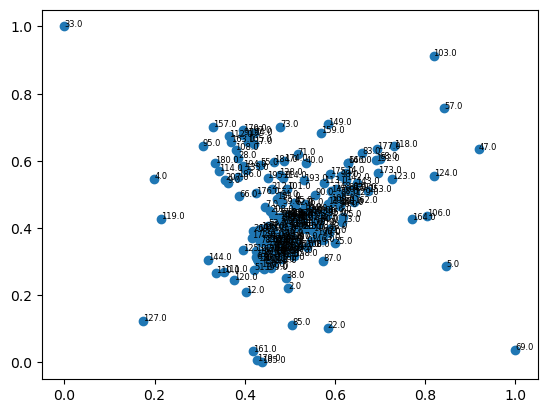

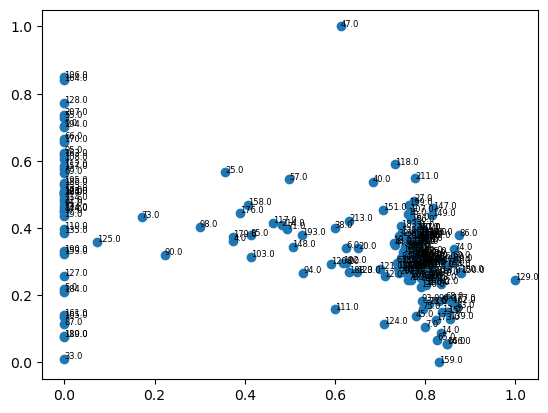

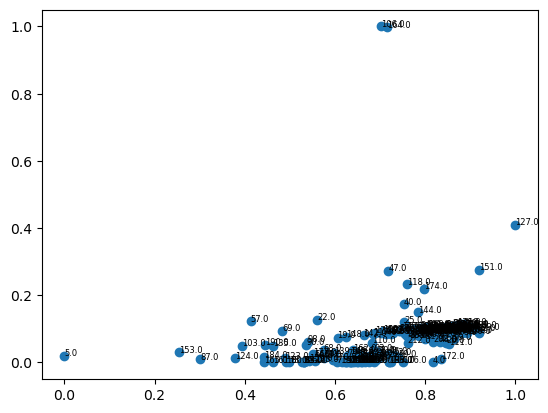

In [38]:
for i in range(0,6,2):
    plt.clf()
    plt.scatter(data[:,i],data[:,i+1])
    for idx,n in enumerate(names):
        plt.annotate(str(n), (data[idx,i],data[idx,i+1]),size = 6)
    plt.show()
        
    